<a href="https://colab.research.google.com/github/btretto03/Studies-for-Real-Time-Emotion-Recognition/blob/main/studies/studies_pytorch/04_simple_neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import torch
import torch.nn as nn # Neural Network
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [331]:
#This script defines a Deep Learning model using the PyTorch framework to classify
#the famous Iris flower dataset.
#1. INPUT FEATURES (in_features = 4):
#   The model expects 4 specific measurements from each flower:
#   - Sepal Length
#   - Sepal Width
#   - Petal Length
#   - Petal Width

#2. OUTPUT FEATURES (out_features=3):
#   The goal is to classify each flower into one of 3 distinct species:
#   - Iris Setosa
#   - Iris Versicolor
#   - Iris Virginica


In [332]:
# Create a model class that inherits nn.module
class Model(nn.Module):
  """
    Model class inheriting from nn.Module, the base class for all neural
    network modules in PyTorch.
    """
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # instantiate our nn.Modele
    self.fc1 = nn.Linear(in_features, h1) # Layer 1: Linear transformation from input to the first hidden dimension
    self.fc2 = nn.Linear(h1, h2) # Layer 2: Linear transformation between hidden dimensions
    self.out = nn.Linear(h2, out_features) # Layer 3: Final transformation to produce the outputs

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [333]:
# Pick a manual seed(41) for randomization
torch.manual_seed(41)

In [334]:
# Create an instance of model
model = Model()

In [335]:
# Data preparation, we will load the dataset from URL
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [336]:
# Convert categorical target labels to numerical values
my_df['species'] = my_df['species'].replace({
    'setosa': 0.0,
    'versicolor': 1.0,
    'virginica': 2.0
})
my_df

/tmp/ipython-input-3181648810.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [337]:
# Separate features (X) and target labels (y), .values transform it in numpy arrays
X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [338]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [339]:
# Convert NumPy arrays to PyTorch Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [340]:
# Set the Criterion (Loss Function) to measure the error
criterion = nn.CrossEntropyLoss()

In [341]:
# Set the Optimizer (Adam) with a specific Learning Rate
# Adam (Adaptive Moment Estimation) updates weights based on the loss gradient
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [342]:
# Training Loop
epochs = 100 #An epoch represents one complete pass of the entire training dataset through the neural network.
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train) #Forward Propagation: Input training data into the model
  loss = criterion(y_pred, y_train) # 2. Compute Loss: Compare predicted values against actual training labels
  losses.append(loss.detach().numpy()) # Keep track of losses for visualization

  # Backpropagation: Fine-tune the weights
  optimizer.zero_grad() # Zero the gradients from the previous step
  loss.backward()      # Compute the gradient of the loss
  optimizer.step()     # Update model parameters (weights/biases)

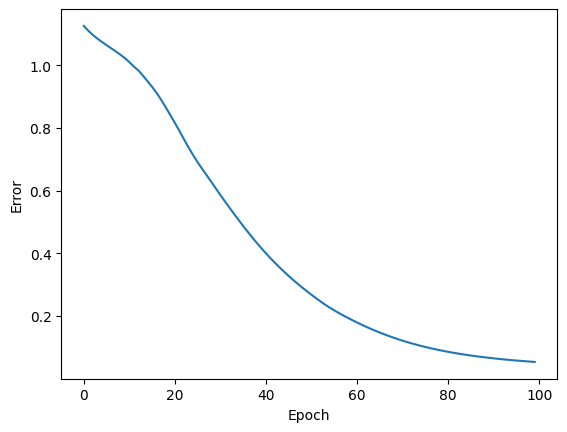

In [343]:
# Plot the training loss over time
plt.plot(range(epochs), losses)
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

In [344]:
# Analisis
with torch.no_grad(): # torch.no_grad() disable backpropagation and weight updates
    y_eval = model.forward(X_test) # Pass the entire test set through the model (Inference)

    # Calculate the loss on the test set to compare with training loss
    loss = criterion(y_eval, y_test)
    print(f'Test Loss: {loss.item()}')

Test Loss: 0.13151279091835022


In [346]:
# Detailed accuracy calculation
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data) # Forward pass for a single data point

    prediction = y_val.argmax().item() # argmax() identifies the index of the maximum value (the predicted class)
    actual = y_test[i].item() # item() extracts the scalar value from the tensor

    if prediction == actual:
      correct += 1
      status = "Correct"
    else:
      status = "Incorrect"

    if i < 9:
      print(f'{i+1}.)  Prediction: {prediction} | Actual: {actual} | Status: {status}')
    else:
      print(f'{i+1}.) Prediction: {prediction} | Actual: {actual} | Status: {status}')

print(f'\nTotal Correct: {correct}/30')

1.)  Prediction: 2 | Actual: 2 | Status: Correct
2.)  Prediction: 2 | Actual: 2 | Status: Correct
3.)  Prediction: 2 | Actual: 2 | Status: Correct
4.)  Prediction: 1 | Actual: 1 | Status: Correct
5.)  Prediction: 2 | Actual: 2 | Status: Correct
6.)  Prediction: 1 | Actual: 1 | Status: Correct
7.)  Prediction: 2 | Actual: 2 | Status: Correct
8.)  Prediction: 1 | Actual: 1 | Status: Correct
9.)  Prediction: 2 | Actual: 2 | Status: Correct
10.) Prediction: 2 | Actual: 2 | Status: Correct
11.) Prediction: 2 | Actual: 2 | Status: Correct
12.) Prediction: 0 | Actual: 0 | Status: Correct
13.) Prediction: 0 | Actual: 0 | Status: Correct
14.) Prediction: 1 | Actual: 1 | Status: Correct
15.) Prediction: 0 | Actual: 0 | Status: Correct
16.) Prediction: 1 | Actual: 2 | Status: Incorrect
17.) Prediction: 0 | Actual: 0 | Status: Correct
18.) Prediction: 2 | Actual: 1 | Status: Incorrect
19.) Prediction: 0 | Actual: 0 | Status: Correct
20.) Prediction: 0 | Actual: 0 | Status: Correct
21.) Prediction:

In [350]:
# Defining new data
new_flower = torch.tensor([5.6, 3.7, 1.3, 0.2])
classes = ['Setosa', 'Versicolor', 'Virginica']

with torch.no_grad():
  prediction_tensor = model(new_flower) # Pass the single data point through the trained model
  predicted_class = prediction_tensor.argmax().item()

print(f"Predicted Species: {classes[predicted_class]}")

Predicted Species: Setosa


In [352]:
# Saving our NN model
torch.save(model.state_dict(), 'my_iris_model.pt')


In [353]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [354]:
# Testing
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)